In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import os
from os import path 
from time import time
import random
import json

In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk import tokenize 
from nltk import Text
from nltk.corpus import stopwords

import nltk

In [3]:
from gensim.summarization.summarizer import summarize

In [4]:
retokenize = RegexpTokenizer("[\w]+")

In [25]:
#Attractions_df = read_frame(attr_qs)
#All_reviews_df = read_frame(review_qs)
#Attractions_df.index = Attractions_df['id']
#All_reviews_df.index = All_reviews_df['id']
#Attractions_df.iloc[:,2:].to_csv('Attractions.csv')
#All_reviews_df.iloc[:,2:].to_csv('All_reviews.csv')

In [6]:
Attractions_df = pd.read_csv("Attractions.csv", index_col = 0)
All_reviews_df = pd.read_csv('All_reviews.csv', index_col = 0)

In [7]:
Attractions_df[Attractions_df['cluster'] == 0.0]

,name,big_sort,small_sort,address,latitude,longitude,cluster,tags,star_info,star_rating,review_sample,wordcloud
id,,,,,,,,,,,,
5,The War Memorial of Korea,Museums,NaN,"29, Itaewon-ro, Yongsan-gu, Seoul 04353 South ...",37.536215,126.977762,0.0,"[""Korean War"", ""a few hours"", ""free entry""]","{""5"":75.0,""4"":22.0,""3"":3.0,""1"":1.0,""2"":0.0,""av...",0.94,"{""neg"": [""Very impressive and full of facts ab...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
6,National Museum of Korea,Museums,NaN,"137 Seobinggo-ro, Yongsan-gu, Seoul 04383 Sout...",37.524664,126.977727,0.0,"[""English"",""free guided tour,"", ""Korean War"", ...","{""5"":67.0,""4"":26.0,""3"":5.0,""2"":2.0,""1"":0.0,""av...",0.92,"{""neg"": [""This is probably not for everyone""],...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
29,Leeum Samsung Museum of Art,Museums,NaN,NaN,37.538395,126.999265,0.0,"[""a few hours"", ""walk around"", ""restaurants""]","{""5"":61.0,""4"":25.0,""3"":7.0,""2"":4.0,""1"":3.0,""av...",0.87,"{""neg"": [""The exhibitions were rather boring i...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
39,D Museum,Museums,NaN,NaN,37.537030,127.011410,0.0,"[""restaurants""]",NaN,0.00,"{""neg"": [""I\u2019d say the customers coming in...",NaN
40,Yongsan Family Park,Nature & Parks,NaN,NaN,37.521685,126.983970,0.0,"[""crowded"", ""cherry blossom"", ""a few hours"", ""...",NaN,0.00,"{""neg"": [""There's nothing much except the muse...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
43,Shinsegae Gangnam,Shopping,NaN,NaN,37.504130,127.003069,0.0,"[""restaurants"", ""easy to navigate""]",NaN,0.00,"{""neg"": [""I'm not sure the name of the mall th...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
45,I-Park Mall,Shopping,NaN,NaN,37.528854,126.964044,0.0,"[""expensive"", ""restaurants"", ""easy to navigate""]","{""4"":58.0,""3"":19.0,""5"":19.0,""1"":4.0,""2"":0.0,""a...",0.78,"{""neg"": [""Went here to check out the electroni...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
46,National Hangeul Museum,Museums,NaN,NaN,37.523851,126.980470,0.0,"[""a few hours"", ""free entry""]","{""3"":36.0,""4"":36.0,""5"":25.0,""2"":4.0,""1"":0.0,""a...",0.77,"{""neg"": [""However, there is not a single word ...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
52,Jeongdong Observatory,Sights & Landmarks,NaN,NaN,37.499690,126.978509,0.0,"[""great view""]",NaN,0.00,"{""neg"": [""Although there is not much standing ...",<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [597]:
import json
star_info_list = []
for name in Attractions_df['name']:
    star_series = All_reviews_df[All_reviews_df['attraction'] == name]['star']
    if len(star_series)>1:
        result_dict = star_series.value_counts(normalize=True).to_dict()
        result_dict["avg"] = int(star_series.mean()*100)/100.0
        result_dict["count"] = len(star_series)
        star_info_list.append((name, json.dumps(result_dict)))

In [598]:
star_info_list

[('Gyeongbokgung Palace',
  '{"5": 0.597972972972973, "4": 0.32882882882882886, "3": 0.06531531531531531, "2": 0.0045045045045045045, "1": 0.0033783783783783786, "avg": 4.51, "count": 888}'),
 ('Bukhansan National Park',
  '{"5": 0.8079268292682927, "4": 0.17378048780487804, "3": 0.01524390243902439, "1": 0.003048780487804878, "avg": 4.78, "count": 328}'),
 ('Myeongdong Shopping Street',
  '{"5": 0.4988610478359909, "4": 0.36104783599088835, "3": 0.12072892938496584, "2": 0.012528473804100227, "1": 0.00683371298405467, "avg": 4.33, "count": 878}'),
 ('Changdeokgung Palace',
  '{"5": 0.5494791666666666, "4": 0.3619791666666667, "3": 0.0703125, "2": 0.014322916666666666, "1": 0.00390625, "avg": 4.43, "count": 768}'),
 ('The War Memorial of Korea',
  '{"5": 0.7144670050761421, "4": 0.24619289340101522, "3": 0.031725888324873094, "2": 0.005076142131979695, "1": 0.0025380710659898475, "avg": 4.66, "count": 788}'),
 ('National Museum of Korea',
  '{"5": 0.609129814550642, "4": 0.306704707560

In [8]:
raw_text = " ".join(All_reviews_df['text'])

In [411]:
#stop_words = set(stopwords.words('english')) 
stop_words = set(['.', ',', 'the',"’","”",")","(", "'s","????","??","???","-"])

stop_words = stop_words
stop_words

{"'s", '(', ')', ',', '-', '.', '??', '???', '????', 'the', '’', '”'}

In [427]:
NUMBER = 8000

lower_text =raw_text.lower().replace(")", " )").replace("(", "( ")

pre_tokens = ngram_tokenizer.tokenize(lower_text)
tokens = [token for token in pre_tokens if token not in stop_words]

text = Text(tokens)
fd = text.vocab()

dict_NUMBER = {word:i for (word, i) in zip(fd, range(len(fd))) if i < NUMBER}
reverse_dict_NUMBER = {i:word for (word, i) in zip(fd, range(len(fd))) if i < NUMBER}

In [428]:
dict_NUMBER.keys()

dict_keys(['and', 'to', 'a', 'of', 'is', 'it', 'in', 'you', 'i', 'for', 'was', 'there', 'this', 'are', 'with', 'of-the', '?', 'on', 'but', '.-the', 'that', 'at', '?-?', 'as', 'place', 'we', 'can', '?-?-?', '!', 'seoul', 'not', '.-i', 'so', '.-it', 'from', 'very', 'if', 'have', 'in-the', 'be', 'visit', 'if-you', 'korean', 'you-can', 'is-a', 'see', 'to-the', 'were', 'it-is', 'here', 'time', 'all', 'one', 'some', 'also', 'or', 'get', 'museum', 'good', 'great', 'an', 'around', '.-there', "n't", 'go', 'many', 'my', 'just', ',-and', 'by', 'it-was', 'nice', 'they', "it-'s", 'up', 'palace', 'do', 'walk', 'which', 'park', 'there-are', 'area', 'food', 'your', 'like', 'take', 'about', 'will', '.-this', ',-but', 'and-the', 'well', 'more', 'city', 'on-the', 'people', 'really', '.-we', 'when', 'had', 'korea', 'at-the', 'out', 'has', 'street', 'day', 'this-is', 'shops', 'beautiful', '.-you', 'would', 'there-is', 'shopping', 'to-see', 'other', 'worth', 'from-the', 'in-seoul', 'only', 'free', ',-the', 

In [429]:
def pre_process(Reviews_df, max_len = 100):
    star_list = list(Reviews_df['star'])
    text_list = list(Reviews_df['text'])
    
    neg_length = star_list.count(3) + star_list.count(2) + star_list.count(1)
    
    pos_text = []
    pos_star = []
    neg_text = []
    neg_star = []
    
    for text, star in zip(text_list, star_list):
        tokens = ngram_tokenizer.tokenize(text)
        processed_list = []
        for token in tokens:
            if token in dict_NUMBER:
                processed_list.append(dict_NUMBER[token])
        if len(processed_list) > 5 and len(processed_list) < max_len:
            if star > 4:
                pos_star.append(1)
                pos_text.append(processed_list)
            else:
                neg_star.append(0)
                neg_text.append(processed_list)
        
    result_text = pos_text + neg_text
    result_star = pos_star + neg_star
        
    X = np.array(result_text)
    Y = np.array(result_star)
    return X, Y

In [430]:
X_head, Y_head = pre_process(All_reviews_df.head())
print(X_head)

[list([99, 1279, 1, 40, 640, 167, 2, 1335, 4314, 507, 12, 4, 35, 534, 0, 1090, 60, 1570, 86, 124, 3, 1814, 4200, 1999, 136, 678, 2581, 2263, 7273, 298, 106, 287, 3313, 5188, 6509, 624, 5345, 1196, 730])
 list([99, 2, 6, 0, 998, 1, 85, 2, 142, 9, 0, 30, 2, 2690, 25, 3910, 5, 10, 2, 6992, 342, 10, 234, 0, 1227, 10, 407, 431, 1102, 272, 412, 1320, 1068, 727, 169, 7274, 3482, 2914, 7006, 1076])
 list([7, 26, 45, 1571, 732, 6, 12, 81, 0, 11, 4, 2, 182, 57, 7, 26, 45, 124, 0, 2093, 43, 501, 269, 499, 615, 1521, 397, 111, 44, 661, 43, 501, 269, 600, 1048, 635, 1617, 2118, 1837, 284, 2509, 635, 1617, 4674])
 list([61, 75, 4, 2, 598, 159, 210, 171, 60, 159, 1, 45, 236, 1846, 161, 2825, 838, 389, 49, 300, 214, 775, 44, 4459, 235, 4554, 3964, 113, 2343, 1589, 5621, 1939, 5474, 3537])]


In [400]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [431]:
reviews_35_df = All_reviews_df[All_reviews_df['star'] != 4]
cluster_n_df = reviews_35_df # [reviews_35_df['attraction'].isin(cluster_dict[5])]

15896


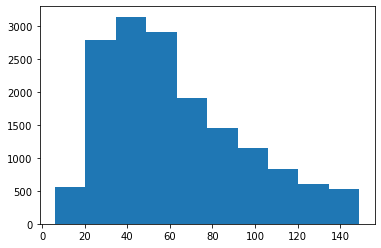

In [432]:
max_len = 150
X, Y = pre_process(cluster_n_df, max_len = max_len)
X_result = [len(s) for s in X if len(s)< max_len]
print(len(X_result))
plt.hist(X_result, bins=10)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [433]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=7)

In [434]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
drop_rate = 0.7
embed_n =64

model = Sequential()
model.add(Embedding(NUMBER, embed_n))
model.add(Dropout(drop_rate))
model.add(LSTM(embed_n))
model.add(Dropout(drop_rate))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model'+str(drop_rate)+str(embed_n)+'.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[es, mc])

Epoch 1/10
224/224 [==============================] - ETA: 0s - loss: 0.1655 - acc: 0.7802
Epoch 00001: val_acc improved from -inf to 0.84088, saving model to best_model0.764.h5
224/224 [==============================] - 21s 92ms/step - loss: 0.1655 - acc: 0.7802 - val_loss: 0.1209 - val_acc: 0.8409
Epoch 2/10
224/224 [==============================] - ETA: 0s - loss: 0.1180 - acc: 0.8408
Epoch 00002: val_acc improved from 0.84088 to 0.85535, saving model to best_model0.764.h5
224/224 [==============================] - 20s 90ms/step - loss: 0.1180 - acc: 0.8408 - val_loss: 0.1096 - val_acc: 0.8553
Epoch 3/10
224/224 [==============================] - ETA: 0s - loss: 0.1004 - acc: 0.8669
Epoch 00003: val_acc improved from 0.85535 to 0.86478, saving model to best_model0.764.h5
224/224 [==============================] - 21s 92ms/step - loss: 0.1004 - acc: 0.8669 - val_loss: 0.1004 - val_acc: 0.8648
Epoch 4/10
224/224 [==============================] - ETA: 0s - loss: 0.0901 - acc: 0.8827


In [443]:
model.load_weights('best_model'+str(drop_rate)+str(embed_n)+'.h5')

정밀 분류율  40.896358543417364 %
이진 분류율  61.904761904761905 %
평균 오차  0.38737893


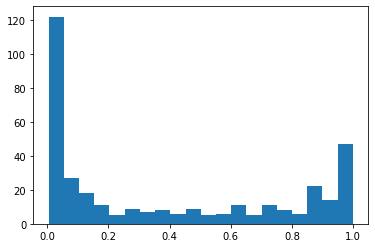

In [444]:
y_pred_array = model.predict(X_test)
a = []
b = 0
c = 0
false_list = []
for X_te, y_pred, y_te in zip(X_test, y_pred_array, y_test):
    if y_te == 0:
        a.append(abs(y_pred - y_te)[0])
        if abs(y_pred - y_te) < 0.1:
            b+=1
        if abs(y_pred - y_te) < 0.5:
            c +=1
        elif abs(y_pred - y_te) > 0.77:
            sent = ""
            for x in X_te:
                if x != 0:
                    sent+= reverse_dict_NUMBER[x] +" "
            false_list.append((y_te, abs(y_pred - y_te)[0] ,sent))

print("정밀 분류율 ", 100*b/len(a),"%")
print("이진 분류율 ", 100*c/len(a),"%")
resi_array = np.array(a)
print("평균 오차 ", resi_array.mean())
plt.hist(resi_array, bins = 20)
plt.show()

In [575]:
def top_low_n(name, n = 3):
    
    the_attraction_df = All_reviews_df[All_reviews_df['attraction']==name]

    if len(the_attraction_df) > 1000:
        all_series = the_attraction_df['text'][::10]
    elif len(the_attraction_df) > 300:
        all_series = the_attraction_df['text'][::3]
    else:
        all_series = the_attraction_df['text']
    pos_sample = sample_n(all_series, n = n, positive=True)
    neg_sample = sample_n(all_series, n = 6, positive=False)
    
    return json.dumps({"pos":pos_sample, "neg":neg_sample})

    
def sample_n(pn_series, n = 3, positive=True):
    pn_text = " ".join(pn_series)     
    # pn_sent_n = pn_text.count(".")
    pn_result = pn_text.split(".") # summarize(pn_text, ratio = 50/pn_sent_n)
    
    pn_sentence_list = [t.replace('\n','') for t in pn_result if t != '' ]
     
    result_sentences = []
    for sentence in pn_sentence_list:
        tokens = ngram_tokenizer.tokenize(sentence)
        processed_list = []
        for token in tokens:
            if token in dict_NUMBER:
                processed_list.append(dict_NUMBER[token])
        result_sentences.append(processed_list)

    X_sentence = np.array(result_sentences)
    X_sentence = pad_sequences(X_sentence, maxlen=60)

    prediction_list = model.predict(X_sentence)

    sent_predict_df = pd.DataFrame([(sentence, prediction) for sentence, prediction in zip(pn_sentence_list, prediction_list)]).sort_values(by = 1)
    
    pn_sample = []    
    
    if positive:
        tail = sent_predict_df.tail(10)
        for star, sentence in zip(tail[1],tail[0]):
            if star > 0.9 and sentence not in pn_sample and len(pn_sample) < n and len(sentence) < 300:
                pn_sample.append(sentence)
                print(star, "  :  ", sentence)
    else:
        head = sent_predict_df.head(10)
        for star, sentence in zip(head[1],head[0]):
            if star < 0.2 and sentence not in pn_sample and len(pn_sample) < n and len(sentence) < 300:
                pn_sample.append(sentence)
                print(star, "  :  ", sentence)
    
    return pn_sample

In [576]:
for i, name in enumerate(Attractions_df['name']):
    print(name, "  start!")
    try:
        result = top_low_n(name, n = 3)
        attraction.review_sample = result
        print("End!")
    except Exception as e:
        print(e)
        continue

Gyeongbokgung Palace   start!
[0.99508893]   :    This beautiful palace was a beautiful trip through history  The English speaking tour guide was great
[0.9955956]   :    Due to time restraints I was only able to stop by for one of the guard-changing ceremonies, but wow! Highly recommended; it's a wonderful opportunity to take-in part of Seoul's rich history, and if you're able to actually go in and see the palace it will undoubtedly be worth it
[0.99565375]   :    Probably a must see for every first time visitor to SeoulThe free tour was great 1330 and 3 or so other departured from the main gate The palace design is amazing
[0.00425234]   :   A nice walk but not much to see or learn here
[0.00428608]   :    But beware that you're only looking at the outside of a lot of buildings that to the untrained eye look very similar to one another
[0.00448143]   :     Keep in mind if you’re expecting something similar to Buckingham Palace you may be mildly disappointed
[0.00472698]   :   frankly

[0.98421115]   :    People are lovely and it is absolutely a great way to spend a few hours here
[0.98456466]   :    Also buy a T Money card to travel with, this is a cheaper option to travel on the subway, taxi etc ,and you can use them in some fast food restaurants
[0.9869399]   :     It appeared to be clean and safe to wander around in but easy to get lost as I did
[0.0007714]   :    It likely goes without saying that Insa-dong is a tourist's paradise--but, oddly enough, not really in a bad way
[0.00359231]   :    This road is a touristic trap, nice to walk by, but nothing special to focus on
[0.0040665]   :    I am leaving this review because I have been extremely disappointed with what I have been seeing the recent years and would not recommend any of my friends to pay for overpriced souvenirs and food
[0.00452423]   :    We were told this is a must while in Seoul, but if time is short you may as well skip this place
[0.00582847]   :    I checked a few items but found the prices t

[0.00371137]   :    Magnificent view over Seoul ( with clear sky ) You can go either by cable car which is not that impressive or from the other side by bus or taxi directly from metro station meyoudong which costs only about 5000 Won I'm sure the views would be nice if it weren't for the smog
[0.00413972]   :    I guess I'm just a bit jaded because of my disappointment
[0.00423235]   :    it’s not bad, but surprisingly little things to see or do for the schlepp
[0.00458264]   :   Just a warning, we used a bus to get here, and it was a pretty steep (though short) hill to climb from the bus stop to the tower Well, it’s a landmark and yes you should see it but I felt a bit let down as I expected more
[0.00583774]   :    Unfortunately there was not much to see
[0.00718841]   :    I am not that athletic but it was ok to walk up
name 'attraction' is not defined
Namsan Park   start!
[0.9935203]   :    it is more beautiful in the upper part, the most important thing is easy to walk, clear sig

[0.97959334]   :    You can easily spent your entire day exploring this place, shop to shop, cafe to cafe, etc
[0.9796996]   :    Lots of couples in traditional hanbok dress add to the atmosphere and the views of the old hanok houses against the background of high rise modern Seoul are fabulous
[0.9822767]   :   Visiting hours are restricted to 10 am to 5 pm Mon - Sat Quick Tip: Make sure to wear comfortable shoes as the sight is pretty hilly and takes couple of hours to explore it entirely
[0.00118321]   :    I guess for me, its a bit too hype on this place but for me i would give just a average review
[0.00590307]   :    Nothing much though except for some traditional looking houses and if short on time, its perfectly fine to give it a miss
[0.00603464]   :    It has been a pretty long walk from Gyeongbokgung but, actually, there's nothing to see
[0.0073207]   :    Bukchon Hanok Village is located to the east of Gyeongbokgung and I guess in the olden days the houses here would be lik

[0.01461142]   :    I went with my friend and we both think the place was much more interesting than what I was expecting
[0.01470706]   :    But it's really fun to get there and experience it anyway! There is no chance that this would be boring for anybody
[0.01549235]   :    Despite all the rave reviews and the pleasure that I gained out of visiting this place I still find the admissions a bit on the expensive side
[0.02655116]   :    It was funny to be able to pose with some statues or to place our head to "be" the statue, but something interesting to me was the few ancient erotic paintings
[0.02662936]   :    Visiting this exhibition was mostly hilarious because I went with a friend who got flustered ; we get why it's not allowed for minors
[0.03480053]   :    For 8,000 Won or about SGD $10 you need about less than 1 hour to complete the exhibits
name 'attraction' is not defined
Seoul Forest   start!
[0.987185]   :    I think it is an amazing experience!!!!!!!! Just great! Great pl

[0.967347]   :    Bugaksan was one of my favorite sights I visited - despite being restrictive in photography, one can still enjoy the beauty and views of the area with the eye
[0.9735126]   :     See you there! The views are fantastic and there are rest stops along the way where you can take a break
[0.9746431]   :    From there, everything is well signed: follow the signs to Malbawi to get to the start of the military area
[0.00449905]   :   There seemed to be a few side trails but as a rule of thumb, we just followed the fortress wall
[0.01192987]   :     At the information desk you will be asked to complete a little form and show your passport and you will be given a visitor tag attached to a lanyard to wear
[0.0120137]   :     I could not - the taxi literally followed the bus and did not save me any time
[0.01563853]   :    They were very pleasant and didn't seem to mind
[0.02629769]   :    It should be noted that there are few signs in English , and at one point a small foot brid

[0.00203872]   :    it si simply a statue in remember of this success, nothing more nothing less
[0.00568315]   :    The statue is in the front of the COEX East Gate and represents two overlapping fists, the popular “horse-riding” dance move from PSY’s song “Gangnam Style”
[0.00985071]   :     I would definitely not go out of my way to see it
[0.01059005]   :    with nice skyscrapers and mall and a special museum dedicated to the modern design Since we are here at Coex centre, we just drop by to take photo of this Gangnam style horse dance statue
[0.01523656]   :    it is nice to see only if you are passing by for any reason, it is not worth to organize or deviate your tour for this
[0.01946661]   :    Saw quite a few people having a little dance and photo ops and we couldn't resist ourselves! It's lit up at night too
name 'attraction' is not defined
Shinsegae Gangnam   start!
[0.9227566]   :    You really can spend whole day for shopping, dinning and coffee! Love this place
[0.9668397

[0.00170863]   :    Clothes are a little on the young side so unless you are buying for a teenage there is nothing to buy
[0.00317648]   :    This review is a little misleading since Hongik University doesn't have much to offer your average traveler
[0.00810751]   :    In comparison to Myeong-dong, the night markets are smaller - but sell similar things, like accessories and fashion
[0.0100984]   :    So don't bother trying to pick up a sweatshirt or souvenir
[0.01030636]   :    The street performers I saw weren’t that good, but that’s not what attracted me to the area
[0.01123583]   :    But to sample what Hongdage really used to be, head down to Yeonamdong, which is not far from Hongdae and is being dubbed as next hipsters' haven
name 'attraction' is not defined
Seoul Museum of Art   start!
[0.96865]   :    Myself in particular loved the display of art work presenting the korea peninsula reunification
[0.9722986]   :    I didn't want to leave, that is how beautiful and amazing their 

[0.9002984]   :    ttukseom resort has more than 3 wonderful swimming pools
[0.9095329]   :    You can have a relaxing picnic while admiring the town on the other side of the river
[0.99719995]   :   Park is very easy to reach by train as the station connects directly to the entrance of the park and the place is huge, so you can spend the whole day to explore and have fun at your own pace with a beautiful han river view
[0.07589719]   :    During winter, the park offers a sled activity for 6000 krw/person
[0.08347479]   :    Even the other attractions are still closed
[0.09002668]   :    We went there with 2 kids aged 6 and 10
[0.11717024]   :    This park has many things to offer
[0.14804718]   :    During summer it would be mch better (According to locals) where you could have fun there are events for drinking as well (mainly in summer)
[0.17053157]   :    The entrance fee for adult is just 5,000 won (Around 5 US dollars)
name 'attraction' is not defined
Seven Luck Casino Gangbuk Hil

[0.00415847]   :    It is a great organization but for a tourist not much of a site to visit unless you go to their demo show "Great Tae Kwon Do"
[0.09768209]   :    After the show they invited people who wanted to break a board to come onto the stage
[0.10246164]   :    Show duration is about one hour and the performance hall is about 10 minutes walk from Gangnam station, exit 12
[0.11296934]   :    I had expected to just see people do some routines
name 'attraction' is not defined
Culture Station Seoul 284   start!
[0.95688057]   :     People are moving fast, everyone is busy and signs are clear to show the direction
[0.9616306]   :    Buses, taxi stands, metro, trains in a clean station
[0.9628893]   :     We took the KTX train south, and later in the week returned to take the airport express train
[0.0011138]   :    The first may probably vary as exhibitions are temporary, but while I was there they were… let say it politely: not worth the detour; the second is marginally more inte

[0.03507408]   :    We only stopped by with a quick question about the Gangnam photo spot for our teenage daughter and were bowled over by the friendliness and helpfulness of the staff
[0.0856722]   :    Go ahead, pay them a visit, and you will not regret
[0.1301134]   :    This instrument is quite expensive
[0.17196986]   :    Also, behind the seocho tourism center there is food-truck-zoon where u can try the Korean style street food
[0.17335129]   :    If you’re visiting Gangnam Station, you should definitely drop by
[0.19021785]   :    I walked in to inquire about the area and two staff members helped orientate me to the area and I walked away with plenty of things to do
name 'attraction' is not defined
Paradise Casino Walkerhill   start!
[0.96021587]   :    The dealers are super friendly, they give you nonstop beverage service with a wide variety of drinks, including alcohol
[0.00135204]   :   Needless to say, I have fired off emails to the Korean casino regulators, where a casino 

[0.00407237]   :    Completely deserted and no activities happening - please don't visit even if insisted by your tour guides The park was close to my hotel, so I went there, it's nothing spectacularly but you can see it in 10-15 min, and it has and old stone formation from an old pagoda
[0.00470829]   :    It would be a shame to not drop by the park if you are already going to Insadong
[0.00493795]   :    It's very small, and apart from the old pagoda and murals, there's really nothing much else to see
[0.007166]   :     Worth seeing if you are visiting Insa-dong The park was close to my hotel, so I went there, it's nothing spectacularly but you can see it in 10-15 min, and it has and old stone formation from an old pagoda
[0.00842825]   :    There's really nothing much in the park besides the two main things I mentioned earlier
[0.00892603]   :     I am 63, and several old men came up to me and asked, in English if I was American
name 'attraction' is not defined
Lotte FitIn   start!


[0.00696918]   :    If you don't come in the correct time it is just an average park
[0.0128009]   :    Do pop by if you are nearby, otherwise I don't think it's worth it to come here
[0.01727691]   :    The only reason to come here is for the Cherry blossom
[0.01902702]   :   A nice park, maybe not worth visiting just for itself, but if you also check out the nearby Hangang Park it's definitely worth a trip
[0.02034026]   :    But I didn't stay long cuz it was so crowded :( About:It's a large recreational area located on an island known as Yeouido Island in central part of Seoul and easy access by subway Line no 5
[0.02487594]   :    We managed to cover the entire park in a short time and it was not tiring either
name 'attraction' is not defined
Olympic Park   start!
[0.9908601]   :    It was calm and beautiful and I loved it
[0.9914056]   :    Take a leisure stroll down the park, luscious trees will provide you shade, benches to rest or have a picnic! And their stadiums are truly maj

[0.9938712]   :    The entrance is really cheap and they offer free guided tours at specific hours, which I highly recommend
[0.99526006]   :     In my opinion this Palace is not as beautiful or a grand as it's neighbour but it does have more of a tranquil feel to it as you walk It was amazing with the beautiful landscape and wonderful well kept history structures
[0.9953878]   :    rent hanbok outside and even get free entry into the palace I enjoyed this palace the gardens are beautiful and the grounds are not to big that you can’t do this in a few hours!! This palace is not as big as others but the different buildings are so aesthetic and outstanding
[0.00318944]   :   Free entry over 60s It is MUST see attraction, however it is not very special
[0.00365868]   :    It's very small, not that much to see, I spent 30 minutes here, it's enough
[0.00927776]   :    If you don't have that much time in Seoul, this one can skip
[0.00958151]   :     After viewing the more popular Gyeongbokgun

[0.00179136]   :    Some of the bad reviews here say it is boring and not worth the trip
[0.05192789]   :    Located a short distance from city hall and FREE to anyone it is worth a stroll along the little river
[0.07301223]   :    I also can't say enough about the street venders selling food
[0.08627799]   :    nice walk and interesting lanterns although most of the display was kids cartoon characters or corporate promotions in the form of lanterns
[0.08796427]   :    Photos just can’t do it justice (at least my iPhone photos!)
[0.09816933]   :    We would return to Seoul just to see this again
name 'attraction' is not defined
Namsangol Hanok Village   start!
[0.96595824]   :     It is very nice walking in to this place and taking pictures in the traditional attire To have a look at the traditional Koran architecture it is recommended to visit Namsangol Hanok village and enjoy in peace a stroll through nicely lined houses and a park
[0.9665214]   :    There is also tea ceremony experi

[0.96857345]   :    We reached the peak just in time for sunset and stayed until the sun has set, when the lights on buildings began to light up this beautiful city
[0.9730687]   :    The best way to learn about the history and changes in the park and the wall surrounding the park book a free walking tour
[0.97607493]   :    This area is clean and safe and offers exercise machines as well
[0.00140741]   :   and there is a nearby attraction - a village of wall paintingyou can see the old city wall, but freakly speaking, it is not very attractive
[0.00355497]   :    It's a nice escape from the city, would definitely recommend after going to Ihwa mural village, but probably wouldn't make the effort to go just for the park
[0.00366443]   :    There's not much to do unless you want to hike up and go further
[0.01642784]   :    To me, the hike is not long, just a short 15 minutes hike but the paths were very steep at some points
[0.02954212]   :    It probably takes 15 or 20 minutes to walk 

[0.9848535]   :    It made me think of a good ole Pioneer Trek and is now on my South Korea to do list! If you are an avid hiker, this is not a huge hike, but to be part of a living museum is an amazing experience4
[0.9892881]   :    But undoubtedly, I will come back here with my friends in a warm and sunny day because it is a perfect place to have a picnic, especially in Naksan Park
[0.9895425]   :    Hiking spot: As the Hanyangdoseong leads through the mountains, it is a wonderful opportunity to enjoy nature and a beautiful view of Seoul
[0.00182098]   :    For example, Sungnyemun gate means polite; Donuimun gate means righteous; Sukjeongmun means wise and Heunginjimun means generous
[0.00194544]   :   It’s not the Great Wall but just a barrier
[0.00433183]   :    Most importantly, we need sites like this to see that we all are not very different and we go through similar trials and can come out strong
[0.00522485]   :    	The main gates set up in the North, South, East and West are 

[0.9771155]   :    I highly recommend this location for fun
[0.9908931]   :     Street perfomers, good bars and restaurants and street performers, what more could you want! Daebakkk!! you know if i had a lot of money i'd definety visit every store
[0.99107337]   :     Its a perfect clash between westerners and Asia!!!  Bring comfortable shoes and plenty of Won, because is gonna be a LONG NIGHT (in a good way)!!! Coming here like hanging around Portobello Market
[0.0026767]   :    a regular street of shops and stalls, and a few “buskers,” but certainly nothing that wasn’t open an hour before
[0.0029791]   :    Its a relatively small market with 30 odd stores setup selling mostly accessory for girls age 16-25
[0.00476411]   :    I am still feeling hungry, luckily there's a mall in Hongdae has Halal Guys for me to dine :P I came to the location after 1 PM that’s when the information said that it “opened” - but found 
[0.00630039]   :     The whole place seem to be swarming with foreign to

[0.9351753]   :    I highly recommend walking through this square after visiting Gyeongbokgung Palace since it's a stone's throw away
[0.93829036]   :    I love seeing the Korean culture and love the city of Seoul
[0.942392]   :    There are also flowers in the middle which looks beautiful especially during the spring
[0.00239384]   :   The square is decent enough to walk through, although it doesn't offer much for visitors beyond a few photo ops
[0.00277147]   :    This square is not a big attraction on its own but in combination with the palace then its ok to visit
[0.0083164]   :   Also if course you want to visit the huge statue of King Sejong and the museum underneath, can spend a good hour or two there An all important Tourist spot, the Square is not quite an attraction by itself but visited alongside nearby tourists spots of the Palace, Museum & Hanook village
[0.01133072]   :   Just down from the two large palaces you will find this quite interesting square in the center of the

[0.9334965]   :    The store is very cute, well decorated with vintage pink hotel atmosphere
[0.9362533]   :   I love the full concept of design, display of the cosmetics like in a toilet settings
[0.9368565]   :    The shop had a lot of spots for phototaking, perfect for your instagram shots
[0.00189281]   :    I asked for a new one and the answer is “it isn’t broken” check it! No sorry nothing
[0.00459912]   :    Didn’t expect to be so “hotel-look” and “fancy”, I totally feel satisfied with the photos and moment I got there
[0.01294345]   :    As a girl, I cannot not take picture :pThis particular cafe has the cutest interior, but taste wise, I think the beverages are so-so
[0.01924983]   :    They seem quite impatient and they glared at customers who didn't buy anything
[0.02777106]   :    They are a bit more expensive compared to street vendors but the quality is way better
[0.04312772]   :    I went to this cafe accidentally since I was looking for makeup stuffs on the lower floor

[0.0043171]   :    At the back of the statue, you will find entrance into an underground museum area where you will find 'The Story of King Sejong' attraction, which shares space with the equally interesting 'The Story of 'The Story of Admiral Yi Sun-Shin'
[0.00559422]   :    Your visit in Seoul will not be complete unless you drop by the Statue of King Sejong
[0.00569144]   :    There is a small museum under the statue but it doesn't have too much information in english, so I would say it is not a must (if you don't speak Korean :))
[0.00741726]   :    Don't make an effort to see it, but you probably will because it's close to so many attractions of downtown Seoul, but just a very big statue
[0.00817031]   :   in front of statue of admiral yi sun-sin there is water fountain but i'm not sure about the performance time
[0.01204419]   :    Not just this statue you can take a picture another statue too
name 'attraction' is not defined
Arario Museum in Space   start!
[0.94438124]   :    We

[0.00570497]   :    Probably not a little little kid's place – fifth graders and beyond would probably be fine
[0.00717914]   :    Sometimes in order to avoid getting brainwashed by one government, it isn't a bad idea to study propaganda of both sides, and stay neutral
[0.00720435]   :     This is a definite skip~~  It is free but not worth your time~~  I have been living in Korea for 10 years and this new museum had so much potential and I was very excited to check it out when it opened but it just doesn't deliver
[0.00820053]   :     I would have liked much more detail, and perhaps it was there in the Korean text, but the English translation was rather brief
[0.01157132]   :    A large portion of the exhibits are Korean language documents, so are a bit boring for non-Korean speakers, but there is generally a good mix of photos, artifacts and information that give you information on Korean politics, economics, development and culture during the modern era
[0.01288342]   :    It covers

[0.00338373]   :    It is worth a 20-30 minute walk around the square to admire the statue and see kids playing in the fountain nearby
[0.005092]   :    I really think the statue is not special in any way although I agree with others that it provides for an excuse to learn more about korean history
[0.00516918]   :    In all fairness, I did not go at night to see it and it might have been way cooler to see it then
[0.00587702]   :     Nice to have a quick look or snap a quick picture
[0.00791076]   :    Not worth travelling there for only this statue but since you'll most likelly be visiting the nearby Palace, have a look If you're going to visit the largest palace (Gyeongbokgung Palace) You might as well take picture with King Sejong and Admiral Yi
[0.00795972]   :    If you want to learn more about Admiral Yi Sun-Shin, it is also well worth your time visiting 'The Story of Admiral Yi Sun-Shin' attraction which shares underground space with the similar 'The Story of King Sejong' here 

[0.97207093]   :    Well worth it! Nice up close view of the tower and amazing view of the city
[0.9731651]   :    The 3-minute ride itself enables you to have a fantastic view of the city so make sure to get your camera ready
[0.97894955]   :   It is perfect way to see the beautiful city of Seoul sky line
[0.00141501]   :    The ride was short, maybe around 3-4 minutes and there's not much to say really
[0.00167292]   :    This felt more like a functional ride rather than a scenic ride and would've been allright to skip this for those with the extra 30 minutes and the energy to climb to the tower instead
[0.00181797]   :    No problem getting into the cable car although a huge crowd was slowly queueing up - no drama, no unsatisfied customers making a scene because they had to wait too long, nothing
[0.00342464]   :   Is it worth the time and effort? Well, the climb is rather steep and is almost impossible while the stairs are slippery, so yes, while not a "must", it's an ok experience

[0.9283791]   :    Beautiful landscape, amazing buildings and macho and good-looking bodyguards that took care of us
[0.94449127]   :   The best part of the tour was when a special guide was assigned to take the 4 English speakers in the group to the shrine next door
[0.9476298]   :    Foreigners are welcome and they give you an audio guide for the tour
[0.00269023]   :    Anyway, there is not much to see inside and no special souvenirs were given to us so we sort of just had a long walk inside the palace complex without even seeing anything inside the palace itself
[0.00386]   :    There is nothing to see in this place as it's crowded and heavily guarded
[0.00423476]   :    It might be fun for the local, but not so interesting to the foreigners
[0.00425768]   :     It was good to get a photo however I preferred to go and spend more time in the neighbouring Museum of Folk History rather than do the short tour
[0.00531182]   :    One member our group had the battery die on his while we 

In [270]:
Attraction.objects.bulk_update(update_list, ['review_sample'])

In [437]:
data = """Lots of clothes , socks , bags , etc . neg
2
There 's an aquarium inside too which I was really tempted to go but I 'd just eaten a bunch of sushi and didn't need a reminder that I had probably eaten Nemo . neg
3
connects two hotels . neg
2
Definitely a must see ! pos
1
We accidentally came across this mall . neu
2
Don't get confused , Quantity does not mean either Quality or a good price . neg
3
Do not forget your camera and the volunteers in costume are very happy to get a photo with you . pos
1
This area is great for the atmosphere , hotels , and variety of different kinds of restaurants and people you will find . pos
2
Overwhelmed by Korean youngers
1
At a certain fee , they can prepare the seafood you bought from the market for you . neg
1
Be sure to reach earlier if you intend to visit the zoo and the various museums there since they close pretty early . neu
2
Fast , clean , and friendly staffs . pos
1
Further more also attendants tickets for adults just following the kids around and not doing rides. neg
3
Other reviews have mentioned the interactive hands free headset. pos
1
A great way to thoroughly enjoy this palace is to emerge yourself into the culture! pos
1
The street itself also quite artsy with some mural and street performance during night. pos
1
There are a lot of shops to choose from . pos
2
Again as before , go with a guide and this palace comes to life.Be prepared to walk , the treasure is the building architecture and the history . pos
1
This branch is the Main & Biggest one . neu
2
Even you can shop some cosmetics ( which is the same store that you can find in Myeongdong ! ) pos
1
There is an old building and a new building next to each other . pos
2
However I am disappointed towards Youll . neg
3
Here we share some day & night photos shot . neu
1
They will push you to buy fresh seafood and will bring you to a bunch of restaurants upstairs and charge you exorbitantly to cook it . neg
3
Was looking forward to coming here but after marvelling at the structure and sculptures outside we were a bit bemused by the inside . neg
3
Nice place . pos
1
Overall a very nice day trip in conjunction with a walk down to Independence Park . neu
1
It 's a residence area . neg
2
I 've never been in a library that is soo huge . pos
1
It was beautifully restored and displayed . neu
1
However , if you need to buy something inside the prices are extremely reasonable . neu
1
If this was all there was in the area then it would be great , but there are some very impressive “ competitors ” nearby . neg
2
The prices are not cheap though but we order 2 set menus consisting of about 10 items which cost about Kwn69,000/- . neu
2
When we got on the bus to go to the tower , I didn ’ t realize that it was at the top of a hill/mountain so I was surprised that we didn ’ t just walk , but I was thankful as we made our way up the windy roads that walking wasn ’ t happening ! pos
2
So if you want to know the other side of Seoul that is more interesting , just stay in Hongdae ! pos
1
Worth a visit ! pos
1
Queues were small to get up and down the tower though . neu
3
The owner gave us a shopping bag and wrote our name in korean . neg
1
Main problem anywhere in Korea is the language barrier . neu
3
You can bargain with for price . neu
2
I forgot the name . neu
2
It 's a well-planned mall for a younger audience with many amenities for events such as the Seoul St. Patty 's Day festival . neu
1
Inside the Seoul metro area I think it is very competitive with cars and riding is generally as fast as driving.English is everywhere and am English speaker can easily use the metro , though specifics like express trains and branch line service can be hard to spot without a little Korean . neu
1
Small portions , so if you have a big appetite neu
3
They have a really interesting library in the middle of the COEX . pos
1
After a brief lesson , you use brush and ink to write the Hangeul word on canvas . pos
1
You can also check out the Hongdae Free Market on Saturdays . pos
1
You can see the whole of Seoul from up here . pos
1
There are 11 floors with top 3 of them dedicated to Duty Free shopping . pos
1
However , fee was charged for camel / pony riding , amusement park and character world.Upon entrance , we were greeted by the awesome autumn scenery with colorful orange , yellow and red leaves on the tall trees . neu
1
Well worth the $ 22 admission price . neu
1
This temple has so much more to offer than the more popular spots in Seoul.Gyeongbokgung Palace was just ... big , while the Temple was wonderfully ornate and less crowded . pos
1
The exhibits and exhibition style was interesting too . neu
1
This place is a quick walkthrough compared to other palaces in Seoul , but it 's worth a visit if you have been to the other palaces . neu
2
Lots of food affordable food available as well . neu
1
Goods sold here tend to be cheaper than what you can find in Meyongdong . neg
1
Nevertheless , the museum is a great chronology of Korean history told through wars . pos
1
The parking garage was cold.- I appreciated that they had us line up in order . neu
2
I think the best experience is to grab any street food you like and munch on them while shopping . pos
1
I definitely recommend the casino , but please note that it is a rather small facility and so finding a table can be very hard with the right limits ( unless you 're a high limits player ) . pos
3
There is a free museum under the statue that mentions Yi Sunshin one of Korea 's greatest heroes and other important exhibits about important dates in Korean history . pos
1
This is also near Pungmoon High School and Choong Ang High School where you can reminisce the drama : ) pos
1
Must do the tower and get a great view of the city . pos
1
It also started pissing it down raining . pos
2
Many shop and food have been changed to modern style but still you can find Korean special style . pos
2
There are several theaters that display either holograms or 3-D presentations . pos
1
Really enjoyed the enjoyed the gardens which this building is situated . pos
1
nice museum close to the gyongborksung palace . neu
1
But , you have to pay for 11,000 won to go up the observatory to see the whole country view . pos
3
He was suspected to die with a complication of diabetes . neu
2
They even have a museum at the top floor . neu
1
Don't worry it so safe : ) pos
1
There are many trails to go to the top of the mountain . neu
2
No entrance fee at all.Boungeunsa Temple is a peaceful retreat that is nestled in the heart of one of the busiest location in Seoul . pos
1
The area is mostly full of ladies stuffs and other home decorations , accessories etc.. pos
1
Would recommend the greenbean pancake , gimbap and bibimbap there ! pos
1
There were a lot of police lined up at the street at that time , so it was interesting in that the old and the new were happening in one place . neu
1
The down side is , it 's mostly only in Korean ! neu
3
We were lucky as there was a traditional korean music performance on the palace grounds as well , so we got to experience that ? ? ? pos
1
The museum is very interested , especially considering that it focuses on modern history and economic development . neu
1
Created by the admiral , this vessel was the world 's best assault ship of the time . pos
1
Even u will find toilets , fitness pos
1
Thus the only option that I notice is sulbing bingsu shop or bring some snacks from the lotte mart outside . neg
3
If you like fresh and good quality seafood this is a total must ! pos
1
It does not disappoint ! pos
1
I also liberated a young man who had been locked in a cell by his ‘ friends ’ . neu
2
Especially if you want to watch a play with your lover , friend or family , and go to a nice and intimate restaurant for dinner , don't hesitate to visit Daehakro . pos
1
! neg
2
It has a wide variety of artifacts including ancient ones . neg
1
Connect this tour with your geokbong palace tour . pos
2
Buy a shirt , support a team and hope that they win ! pos
1
The place is small and crowded . neg
3
While walking the ground of the shrine , I said to her “ ah-reum-dap-da ” which was to compliment it to be such a pretty and serene place . pos
1
Wouldn't recommend coming all the way for this . neg
3
I advise you not to visit Korea House unless you sleep on money . neg
3
You will find Bonghwadae ( beacon mound ) at the top as it was once the center of capital defense . pos
1
Good way to spend an hour . neu
1
I would recommend to visit during day time until 8 PM . pos
2
I just feel bad that all were enclosed ... neu
3
It 's just a gate as part of the larger Gyeongbokgung Palace . neu
2""".lower()

In [438]:
h_test_list = []
sentence_of_n = ""
for line in data.split('\n'):
    try:
        tag_num = int(line)
        if tag_num == 1:
            tag = 1
        elif tag_num == 2:
            tag = 0.5
        else:
            tag = 0
        h_test_list.append((sentence_of_n[:-4], tag))
    except ValueError:
        sentence_of_n = line
h_test_list[:5]

[('lots of clothes , socks , bags , etc .', 0.5),
 ("there 's an aquarium inside too which i was really tempted to go but i 'd just eaten a bunch of sushi and didn't need a reminder that i had probably eaten nemo .",
  0),
 ('connects two hotels .', 0.5),
 ('definitely a must see !', 1),
 ('we accidentally came across this mall .', 0.5)]

In [439]:
result_sentences = []
h_list = []

for sentence, n in h_test_list:
    tokens = ngram_tokenizer.tokenize(sentence)
    processed_list = []
    for token in tokens:
        if token in dict_NUMBER:
            processed_list.append(dict_NUMBER[token])
    result_sentences.append(processed_list)
    h_list.append(n)

In [440]:
X_sentence = np.array(result_sentences)
X_sentence = pad_sequences(X_sentence, maxlen=max_len)

In [441]:
from keras.models import load_model 

1 [0.46901894] ('at a certain fee , they can prepare the seafood you bought from the market for you .', 1)
0 [0.5232357] ('they will push you to buy fresh seafood and will bring you to a bunch of restaurants upstairs and charge you exorbitantly to cook it .', 0)
1 [0.46401682] ('however , if you need to buy something inside the prices are extremely reasonable .', 1)
0 [0.9314553] ('main problem anywhere in korea is the language barrier .', 0)
1 [0.44750884] ('after a brief lesson , you use brush and ink to write the hangeul word on canvas .', 1)
1 [0.48383933] ('the exhibits and exhibition style was interesting too .', 1)
1 [0.46071845] ('goods sold here tend to be cheaper than what you can find in meyongdong .', 1)
1 [0.16195709] ('there were a lot of police lined up at the street at that time , so it was interesting in that the old and the new were happening in one place .', 1)
0 [0.50982374] ("the down side is , it 's mostly only in korean !", 0)
0 [0.7081233] ('thus the only option

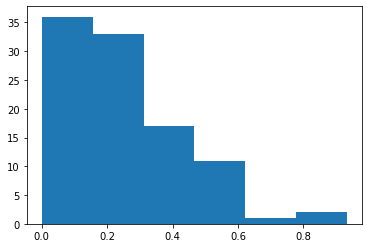

In [442]:
drop_rate = 0.7
embed_n =64
model = Sequential()
model.add(Embedding(NUMBER, embed_n))
model.add(Dropout(drop_rate))
model.add(LSTM(embed_n))
model.add(Dropout(drop_rate))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['acc'])
model.load_weights('best_model'+str(drop_rate)+str(embed_n)+'.h5')

prediction_list = model.predict(X_sentence)
residual_list = []
a = 0
b = 0
c = 0
for h, p, S in zip(h_list, prediction_list, h_test_list):    
    
    r=p
    
    if h != 2:
        a += 1
        residual_list.append(abs(h - r))
        if abs(h - r) < 0.5:
            b += 1        
            if abs(h - r) < 0.33:
                c += 1
        else:
            print(h,r,S)

print("0.33 이내",c/a)
print("0.5  이내",b/a)

plt.hist(np.array(residual_list), bins = 6)
plt.show()

In [301]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import gensim
from gensim.utils import SaveLoad as SL
# Set file names for train and test data


In [302]:
def read_corpus(data_list, tokens_only=False):
    for i,text in data_list:
        tokens = gensim.utils.simple_preprocess(text)
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [ ]:
data_list = []
for i, name in zip(Attractions_df.index ,Attractions_df['name']):
    attraction_series = All_reviews_df[All_reviews_df['attraction']==name]['text']
    if len(attraction_series) >300:
        if len(attraction_series) > 1000:
            attraction_series = All_reviews_df[All_reviews_df['attraction']==name]['text'][::5]
        else:
            attraction_series = All_reviews_df[All_reviews_df['attraction']==name]['text'][::2]
    else:
        attraction_series = All_reviews_df[All_reviews_df['attraction']==name]['text']
    
    text = " ".join(attraction_series)
    sent_n = text.count(".")
    if sent_n != 0:
        result = summarize(text, ratio = 100 / sent_n)
        data_list.append((i, result))

In [438]:
df_5 = All_reviews_df[All_reviews_df['star'] == 5]
df_123 = All_reviews_df[All_reviews_df['star'] < 4]

reviews_5 = df_5['text'][::3]
star_5 = df_5['star'][::3]
reviews_123 = df_123['text']
star_123 = df_123['star']

data_list = [(i, review) for i, review in enumerate(reviews_5)]

star_5 = star_5

In [439]:
print(len(data_list))
print(len(star_5))

4496
4496


In [440]:
train_corpus = list(read_corpus(data_list))
test_corpus = list(read_corpus(data_list, tokens_only=True))

In [441]:
train_corpus[3]

TaggedDocument(words=['highly', 'recommend', 'getting', 'guide', 'as', 'the', 'information', 'brings', 'the', 'palace', 'to', 'life', 'we', 'got', 'there', 'by', 'am', 'to', 'seeing', 'the', 'changing', 'of', 'the', 'guard', 'we', 'learned', 'about', 'the', 'gates', 'the', 'palace', 'how', 'the', 'king', 'and', 'queen', 'lived', 'and', 'so', 'much', 'more', 'great', 'palce', 'to', 'get', 'pictures'], tags=[3])

In [443]:
doc2model = gensim.models.doc2vec.Doc2Vec(vector_size=4, min_count=2, epochs=40)
doc2model.build_vocab(train_corpus)
doc2model.train(train_corpus, total_examples=doc2model.corpus_count, epochs=doc2model.epochs)

2020-06-24 15:37:12,614 : INFO : collecting all words and their counts
2020-06-24 15:37:12,615 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-06-24 15:37:12,676 : INFO : collected 11423 word types and 4496 unique tags from a corpus of 4496 examples and 268598 words
2020-06-24 15:37:12,678 : INFO : Loading a fresh vocabulary
2020-06-24 15:37:12,698 : INFO : effective_min_count=2 retains 6441 unique words (56% of original 11423, drops 4982)
2020-06-24 15:37:12,699 : INFO : effective_min_count=2 leaves 263616 word corpus (98% of original 268598, drops 4982)
2020-06-24 15:37:12,727 : INFO : deleting the raw counts dictionary of 11423 items
2020-06-24 15:37:12,728 : INFO : sample=0.001 downsamples 58 most-common words
2020-06-24 15:37:12,729 : INFO : downsampling leaves estimated 195497 word corpus (74.2% of prior 263616)
2020-06-24 15:37:12,755 : INFO : estimated required memory for 6441 words and 4 dimensions: 3498548 bytes
2020-06-24 15:37:12,755 : I

2020-06-24 15:37:22,149 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-24 15:37:22,163 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-24 15:37:22,164 : INFO : EPOCH - 18 : training on 268598 raw words (200238 effective words) took 0.4s, 559481 effective words/s
2020-06-24 15:37:22,533 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-24 15:37:22,536 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-24 15:37:22,542 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-24 15:37:22,543 : INFO : EPOCH - 19 : training on 268598 raw words (199996 effective words) took 0.4s, 533203 effective words/s
2020-06-24 15:37:22,920 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-24 15:37:22,922 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-24 15:37:22,924 : INFO : worker thread finished; awaiting finish of 0 more threads


2020-06-24 15:37:29,562 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-24 15:37:29,563 : INFO : EPOCH - 38 : training on 268598 raw words (200070 effective words) took 0.4s, 533900 effective words/s
2020-06-24 15:37:29,906 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-24 15:37:29,911 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-24 15:37:29,914 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-24 15:37:29,915 : INFO : EPOCH - 39 : training on 268598 raw words (199967 effective words) took 0.3s, 578735 effective words/s
2020-06-24 15:37:30,242 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-24 15:37:30,247 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-24 15:37:30,254 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-24 15:37:30,255 : INFO : EPOCH - 40 : training on 268598 raw words (199801 effectiv

In [444]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = doc2model.infer_vector(test_corpus[doc_id])
sims = doc2model.docvecs.most_similar([inferred_vector], topn=len(doc2model.docvecs))

# Compare and print the most/median/least similar documents from the train corpus
print(doc_id)
sims_dict = {i : int((value + 9) * 100)/1000 for i, value in sims}
print(min(sims_dict.values()))

2020-06-24 15:38:02,472 : INFO : precomputing L2-norms of doc weight vectors


1681
0.869


In [445]:
X = []
for doc_id in range(len(train_corpus)):
    inferred_vector = doc2model.infer_vector(train_corpus[doc_id].words)
    X.append(inferred_vector)
len(X)

4496

In [446]:
y = [int(star > 4) for star in star_5]
len(y)

4496

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [425]:
X_test_zero, y_test_zero = [], []
for xt, yt in zip(X_test, y_test):
    if yt == 0:
        X_test_zero.append(xt)
        y_test_zero.append(yt)

In [426]:
forest = RandomForestClassifier(ccp_alpha=0.00005, criterion='gini',
                                max_depth=20 ,n_estimators=10,random_state=9)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test_zero,y_test_zero)))

훈련 세트 정확도 : 0.986
테스트 세트 정확도 : 0.743


In [427]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.pipeline import Pipeline
nca = NeighborhoodComponentsAnalysis(random_state=7,n_components=3)
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

nca_pipe = Pipeline([('nca', nca), ('knn', knn)])

In [428]:
nca_pipe.fit(X_train[::3], y_train[::3])
print(nca_pipe.score(X_test_zero,y_test_zero))

0.6217948717948718


In [447]:
from sklearn import cluster
from sklearn import metrics

max_ss = 0
max_n = 0
max_kmeans = None

for NUM_CLUSTERS in range(2,10):
    
    kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS, random_state =7)
    kmeans.fit(X)

    labels = kmeans.labels_

    silhouette_score = metrics.silhouette_score(X, labels, metric='cosine')

    print (NUM_CLUSTERS,"   :   ",silhouette_score)

    if max_ss < silhouette_score:
        max_ss = silhouette_score
        max_n = NUM_CLUSTERS
        max_kmeans = kmeans
        
print(max_n)
print(max_ss)

2    :    0.42004684
3    :    0.41778922
4    :    0.3714524
5    :    0.32951307
6    :    0.2955629
7    :    0.2556248
8    :    0.2610916
9    :    0.24010824
2
0.42004684


In [449]:
kmeans = cluster.KMeans(n_clusters=3, random_state =7)
kmeans.fit(X)

labels = kmeans.labels_

silhouette_score = metrics.silhouette_score(X, labels, metric='cosine')

print (3,"   :   ",silhouette_score)

3    :    0.41778922


In [450]:
cluster_dict = {}
for i, label in zip(Attractions_df.index, labels):
    if label not in cluster_dict:
        cluster_dict[label] = []
        
    cluster_dict[label].append(Attractions_df['name'][i])
    
cluster_dict

{0: ['Gyeongbokgung Palace',
  'Bukhansan National Park',
  'Myeongdong Shopping Street',
  'Changdeokgung Palace',
  'The War Memorial of Korea',
  'National Museum of Korea',
  'Insadong',
  'Trickeye Museum Seoul',
  'Lotte World Tower & Mall',
  'KTX (Korea Train Express)',
  'Seoul Metro',
  'Hangang Park',
  'N Seoul Tower',
  'Namsan Park',
  'Myeongdong NANTA Theater',
  'Cheonggyecheon Stream',
  'Jogyesa Temple',
  'Bongeunsa Temple',
  'Haneul Park',
  'Hongik University Street',
  'Ewha Womans University',
  'Dongdaemun Design Plaza (DDP)',
  'Starfield Library',
  'Love Museum',
  'Yeouido Hangang Park',
  'Leeum Samsung Museum of Art',
  'Seoul Sky',
  'Doota',
  'apm Place',
  'Bugaksan Seoul Fortress',
  'Korean Postage Stamp Museum',
  'Star Avenue at Lotte World',
  'Migliore Dongdaemun Shop',
  'Lotte Young Plaza Myeongdong',
  'D Museum',
  'Yongsan Family Park',
  'Statue of Gangnam Style',
  'Shinsegae Gangnam',
  'Dongdaemun Gate (Heunginjimun)',
  'I-Park Mall',

In [105]:
Attractions_df.index

,big_sort,name,latitude,longitude,cluster,star_rating
0,Sights & Landmarks,Gyeongbokgung Palace,37.577362,126.976684,1.0,0.92
1,Nature & Parks,Bukhansan National Park,37.612085,127.008250,1.0,0.96
2,Sights & Landmarks,Myeongdong Shopping Street,37.564091,126.997940,1.0,0.89
3,Sights & Landmarks,Changdeokgung Palace,37.580095,126.991849,1.0,0.89
4,Museums,The War Memorial of Korea,37.536215,126.977762,0.0,0.94


In [107]:
 Attractions_df.loc[4,'name']

'The War Memorial of Korea'

In [407]:
from collections import defaultdict

def get_ngram_counter(all_reviews_df, min_count=10, n_range=(1,3)):

    docs = []
    names = []
    for i in Attractions_df.index:
        name = Attractions_df.loc[i,'name']
        names.append(name)
        doc = " ".join(All_reviews_df[All_reviews_df['attraction'] == name]['text'])
        docs.append(doc)
    
    def to_ngrams(words, n):
        ngrams = []
        length = len(words)
        for b in range(0, len(words) - n + 1):
            result = tuple(words[b:b+n])
            if words[0] not in stop_words and words[-1] not in stop_words:              
                ngrams.append(result)
        return ngrams

    n_begin, n_end = n_range
    ngram_counter = defaultdict(int)
    for i, doc in enumerate(docs):
        words = tokenize.word_tokenize(doc)
        for n in range(n_begin, n_end + 1):
            for ngram in to_ngrams(words, n):
                ngram_counter[ngram] += 1
        print(names[i], " is finished!")

    ngram_counter = { ngram:count for ngram, count in ngram_counter.items() if count >= min_count }

    return ngram_counter

ngram_counter = get_ngram_counter(All_reviews_df, min_count=10, n_range=(1,3))

Gyeongbokgung Palace  is finished!
Bukhansan National Park  is finished!
Myeongdong Shopping Street  is finished!
Changdeokgung Palace  is finished!
The War Memorial of Korea  is finished!
National Museum of Korea  is finished!
Insadong  is finished!
Trickeye Museum Seoul  is finished!
Lotte World Tower & Mall  is finished!
KTX (Korea Train Express)  is finished!
Seoul Metro  is finished!
Hangang Park  is finished!
N Seoul Tower  is finished!
Namsan Park  is finished!
Myeongdong NANTA Theater  is finished!
Cheonggyecheon Stream  is finished!
Jogyesa Temple  is finished!
Bongeunsa Temple  is finished!
Haneul Park  is finished!
Bukchon Hanok Village  is finished!
Hongik University Street  is finished!
Ewha Womans University  is finished!
Dongdaemun Design Plaza (DDP)  is finished!
Starfield Library  is finished!
Kwangjang Market  is finished!
Love Museum  is finished!
Seoul Forest  is finished!
Yeouido Hangang Park  is finished!
Leeum Samsung Museum of Art  is finished!
Seoul Sky  is fin

In [408]:
len(ngram_counter)

12869

In [413]:
class NgramTokenizer:

    def __init__(self, ngrams, base_tokenizer, n_range=(1, 3)):
        self.ngrams = ngrams
        self.base_tokenizer = base_tokenizer
        self.n_range = n_range

    def __call__(self, sent):
        return self.tokenize(sent)

    def _to_ngrams(self, words, n):
        ngrams = []
        for b in range(0, len(words) - n + 1):
            ngram = tuple(words[b:b+n])
            if ngram in self.ngrams:
                ngrams.append(ngram)
        return ngrams
    
    def tokenize(self, sent):
        if not sent:
            return []

        unigrams = self.base_tokenizer(sent)

        n_begin, n_end = self.n_range
        ngrams = []
        for n in range(n_begin, n_end + 1):
            for ngram in self._to_ngrams(unigrams, n):
                if n != 1:
                    result = '-'.join(ngram)
                    if result[-1] not in stop_words:
                        ngrams.append(result)
                else:
                    ngrams.append(ngram[0])
        return ngrams


ngram_tokenizer = NgramTokenizer(ngram_counter, tokenize.word_tokenize, n_range=(1, 3))

In [11]:
tag_dict ={
    "a few hours":['an-hour','about-an-hour','1-hour','a-few-hours', 'few-hours','1-2-hours','2-hours','1.5-hours'],
    "mountain":['the-mountain','mountain-.'],
    "nature":['nature-.','nature-and'],
    "reasonable":['reasonable-price','good-price','worth-the-price','very-cheap'],
    "expensive":['very-expensive','bit-expensive','quite-expensive','more-expensive', 'not-cheap'],
    "crowded":['packed-with-people','crowded-.','many-visitors','too-many-people','very-crowded','too-crowded'],
    "easy to navigate":['easy-to-navigate','easy-to-find', 'easy-to-get','easy-to-reach'],
    "shuttle bus":['shuttle-bus'],
    "restaurants":['good-restaurants','restaurants-.','restaurants-,','and-restaurants','restaurants-and'],
    "free entry": ['Admission-is-free', 'Entrance-is-free', 'free-entry', 'free-entrance'],
    "free guided tour": ['free-guided-tour','free-guided-tours'],
    "English":['good-English','free-English','English-guided'],
    "traditional house":['traditional-houses', 'traditional-Korean-houses'],
    "traditional dress":['traditional-dress','traditional-costume','traditional-costumes','traditional-clothing','traditional-clothes'],
    "traditional market":['traditional-market'],
    "fish market":['fish-market'],
    "cherry blossom":['the-cherry-blossoms','the-cherry-blossom','cherry-blossoms-.','cherry-blossom-trees','cherry-blossom','cherry-blossomss'],
    "Japanese Occupation":['Japanese-occupation','the-Japanese-occupation'],
    "Korean War":['Korean-War','Korean-War-.','the-Korean-War','Korean-war-.','korean-war-.'],
    "great view":['great-view','a-great-view','panoramic-view','great-view-of'],
    "night view":['the-night-view','especially-at-night','night-view'],
    "gard changing ceremony": ['guard-changing-ceremony','guard-ceremony'],
    "walk around":['walk-around','to-walk-around','walk-around-.','a-nice-stroll','walk-around-,','walk-around-and']
}

In [12]:
name_tag_dict = {}

for name in Attractions_df['name'][:]:
    docs = " ".join(All_reviews_df[All_reviews_df['attraction'] == name]['text'])

    ngrams = ngram_tokenizer.tokenize(docs)

    attr_tag_dict = {}

    for ngram in ngrams:
        for tag, candidates in tag_dict.items():
            if ngram in candidates:
                if tag not in attr_tag_dict:
                    attr_tag_dict[tag] = 1
                else:
                    attr_tag_dict[tag] += 1
    tag_list = []            
    for key in attr_tag_dict.keys():
        if attr_tag_dict[key] > 20 * (len(ngrams)/51709):
            tag_list.append(key)
    
                
    if len(tag_list) != 0:
        print(name,"(",len(ngrams),") : ",tag_list)
        name_tag_dict[name] = tag_list

Gyeongbokgung Palace ( 51709 ) :  ['traditional dress', 'gard changing ceremony', 'a few hours', 'walk around', 'free entry']
Bukhansan National Park ( 20954 ) :  ['nature', 'mountain', 'a few hours', 'easy to navigate']
Myeongdong Shopping Street ( 42759 ) :  ['expensive', 'restaurants', 'crowded', 'walk around', 'reasonable', 'a few hours']
Changdeokgung Palace ( 46761 ) :  ['a few hours', 'traditional dress', 'walk around']
The War Memorial of Korea ( 46329 ) :  ['Korean War', 'a few hours', 'free entry']
National Museum of Korea ( 47056 ) :  ['English', 'Korean War', 'a few hours', 'free entry', 'restaurants', 'walk around']
Insadong ( 38059 ) :  ['restaurants', 'expensive', 'a few hours', 'walk around']
Trickeye Museum Seoul ( 19552 ) :  ['a few hours']
Lotte World Tower & Mall ( 24627 ) :  ['expensive', 'restaurants', 'great view', 'walk around', 'a few hours', 'crowded']
KTX (Korea Train Express) ( 23601 ) :  ['a few hours', 'easy to navigate']
Seoul Metro ( 42784 ) :  ['crowded

Lotte World ( 29845 ) :  ['a few hours', 'walk around', 'restaurants', 'crowded', 'great view', 'expensive']
Inwangsan Mountain ( 6458 ) :  ['mountain', 'a few hours', 'great view']
Majang Meat Market ( 2820 ) :  ['expensive', 'restaurants']
Seoul Museum of History ( 11199 ) :  ['a few hours', 'Korean War', 'Japanese Occupation', 'walk around', 'free entry']
Seoul City Wall ( 12883 ) :  ['a few hours', 'nature', 'night view', 'easy to navigate']
Ikseon-dong Hanok Street ( 1825 ) :  ['a few hours', 'restaurants', 'crowded', 'walk around', 'traditional dress']
Jongmyo Shrine ( 22942 ) :  ['a few hours', 'English']
GOTO Mall ( 1957 ) :  ['reasonable']
National Museum of Modern and Contemporary Art Seoul ( 5483 ) :  ['Korean War', 'Japanese Occupation', 'a few hours', 'walk around']
Seokchon Lake ( 3441 ) :  ['cherry blossom', 'crowded', 'walk around']
National Palace Museum of Korea ( 8755 ) :  ['a few hours', 'free entry']
Hongdae Art Market Free Market ( 5515 ) :  ['crowded', 'restauran

In [13]:
update_list = []
for attraction in attr_qs:
    try:
        tags = name_tag_dict[attraction.name]
        attraction.tags = json.dumps(tags)
        update_list.append(attraction)
    except:
        print(attraction.name," has no tags")

apm Place  has no tags
Korean Postage Stamp Museum  has no tags
Star Avenue at Lotte World  has no tags
Gilsangsa Shrine  has no tags
Kwanghee Fasion Mall  has no tags
Ice Gallery  has no tags
Kukkiwon World Taekwondo Headquarters  has no tags
KBS On  has no tags
An Jung-geun Memorial Hall  has no tags
Amore Pacific Museum of Art  has no tags
Baek In-je's House  has no tags
Yangjae Citizens' Park  has no tags
L’atelier  has no tags
Seoul International Fireworks Festival  has no tags
Hyundai Department Store Apgujeong Main  has no tags


In [14]:
Attraction.objects.bulk_update(update_list,['tags'])